In [1]:
%matplotlib notebook
from libsignetsim import Model, TimeseriesSimulation, Experiment, ModelVsTimeseriesOptimization, SigNetSimFigure

In [2]:
def printError(e=None):
    if e is None:
        print("Something went wrong !")
    else:
        print("Error")

In [3]:
def showFittedComparaison():
    print("Model fitted. Error = %g" % fit.finalScore)
    
    parameters = fit.readOptimizationOutput()
    for parameter, value in parameters.items():
        parameter.setValue(value)
    
    showComparaison()

In [4]:
def showComparaison():
    
    sim = TimeseriesSimulation([m], time_min=0, time_ech=0.1, time_max=20)
    sim.run()
    figure = SigNetSimFigure()
    plots = experiment.plot(figure=figure, suffix=" (data)", marker='.')
    sim.plot(figure=figure, plot=plots[0], variables=['P'], suffix=" (model)")

## Settings up a model with a Michaelis-Menten reaction

In [5]:
m = Model()
m.setName("Enzymatic Reaction")

e = m.listOfSpecies.new("E")
s = m.listOfSpecies.new("S")
p = m.listOfSpecies.new("P")

m.listOfParameters.new("vmax", 1)
m.listOfParameters.new("km", 1)

r = m.listOfReactions.new("Enzymatic reaction")
r.listOfReactants.add(s)
r.listOfModifiers.add(e)
r.listOfProducts.add(p)
r.kineticLaw.setPrettyPrintMathFormula("vmax*E*S/(km+S)")

e.setValue(10)
s.setValue(12)
p.setValue(0)

## Setting up experimental data

In [6]:
reference_times = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]
reference_data = [0.0, 2, 3.5, 5.5, 7, 9, 10, 11.5, 12, 12, 12, 12, 12, 12, 12, 12, 12]

# Building the experiment
experiment = Experiment()
condition = experiment.createCondition()
for i, data in enumerate(reference_data):
    condition.addObservation(reference_times[i], 'P', data)

## Comparing simulation vs experimental data

<IPython.core.display.Javascript object>


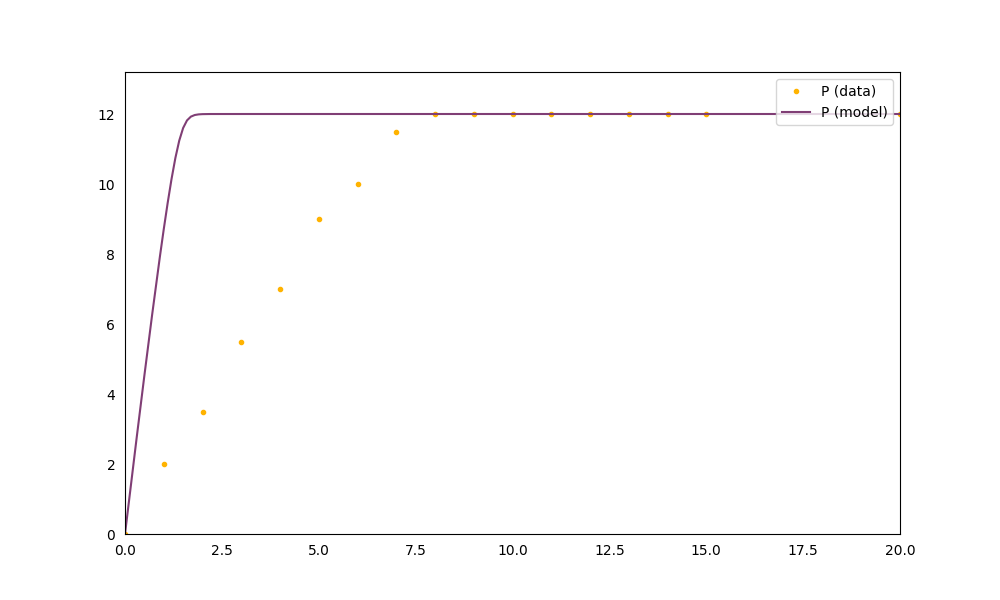

In [7]:
showComparaison()

# Fitting the model, comparing when finished

In [8]:
selected_parameters = []
for parameter in m.listOfParameters:
    selected_parameters.append((parameter, 1, 1e-6, 1e+6, 4))

In [9]:
fit = ModelVsTimeseriesOptimization(
    workingModel=m,
    list_of_experiments=[experiment],
    parameters_to_fit=selected_parameters,
    #p_lambda=1
)
thread = fit.run_async(showFittedComparaison, printError, 2)